Mengimport Libbrary yang dibutuhkan

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

Dataset yang digunakan

In [2]:
# Membaca data dari file CSV
data = pd.read_csv('hotel_booking.csv')


**Melakukan processing data**
data = data.drop(['company', 'reservation_status', 'reservation_status_date', 'name', 'email', 'phone-number', 'credit_card'], axis=1): Baris ini digunakan untuk menghapus kolom-kolom yang dianggap tidak relevan dalam dataset. Kolom-kolom yang dihapus adalah 'company', 'reservation_status', 'reservation_status_date', 'name', 'email', 'phone-number', dan 'credit_card'.

data['children'] = data['children'].fillna(0): Baris ini digunakan untuk mengisi nilai yang hilang (missing values) pada kolom 'children' dengan nilai 0.

data['country'] = data['country'].fillna('Unknown'): Baris ini digunakan untuk mengisi nilai yang hilang (missing values) pada kolom 'country' dengan nilai 'Unknown'.

data['agent'] = data['agent'].fillna(0): Baris ini digunakan untuk mengisi nilai yang hilang (missing values) pada kolom 'agent' dengan nilai 0.

data['country'] = data['country'].fillna('Unknown'): Baris ini digunakan untuk mengisi nilai yang hilang (missing values) pada kolom 'country' dengan nilai 'Unknown'. Ini adalah duplikasi dari baris ke-3.

data['children'] = data['children'].astype(int): Baris ini digunakan untuk mengubah tipe data kolom 'children' menjadi integer.

data['is_canceled'] = data['is_canceled'].astype(int): Baris ini digunakan untuk mengubah tipe data kolom 'is_canceled' menjadi integer.

Secara keseluruhan, bagian ini melakukan beberapa langkah preprocessing data seperti penghapusan kolom yang tidak relevan, pengisian nilai yang hilang, dan perubahan tipe data. Tujuannya adalah untuk membersihkan dan mempersiapkan data sebelum dilakukan analisis lebih lanjut atau pemodelan.

In [3]:

# Preprocessing data
data = data.drop(['company', 'reservation_status', 'reservation_status_date', 'name', 'email', 'phone-number', 'credit_card'], axis=1)
data['children'] = data['children'].fillna(0)
data['country'] = data['country'].fillna('Unknown')
data['agent'] = data['agent'].fillna(0)
data['country'] = data['country'].fillna('Unknown')
data['children'] = data['children'].astype(int)
data['is_canceled'] = data['is_canceled'].astype(int)

Mengubah nilai-nilai kategorikal menjadi numerik menggunakan **LabelEncoder**# New Section

In [4]:

# Inisialisasi objek LabelEncoder
label_encoder = LabelEncoder()


**, label_encoder **adalah objek dari kelas LabelEncoder yang telah diinisialisasi sebelumnya. Proses ini berguna ketika algoritma pembelajaran mesin membutuhkan input berupa bilangan bulat, dan dengan menggunakan LabelEncoder, kita dapat mengubah nilai-nilai kategorikal menjadi bilangan bulat sehingga dapat digunakan dalam model.

Jadi, dengan baris kode tersebut, nilai-nilai kategorikal dalam dataset akan diubah menjadi nilai numerik menggunakan LabelEncoder.

In [5]:
# Mengubah nilai-nilai kategorikal menjadi numerik menggunakan LabelEncoder
for col in data.select_dtypes(include='object').columns:
    data[col] = label_encoder.fit_transform(data[col])

SPLIT DATA MENJJADI PELATIHAN DAN PENGUJIAN

In [6]:
# Split data menjadi data pelatihan dan data pengujian
X = data.drop(['is_canceled'], axis=1)
y = data['is_canceled']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

** =**bold text** SimpleImputer(strategy='most_frequent'): **Baris ini digunak**an untuk menginisialisasi objek SimpleImputer dengan strategi 'most_frequent'. Strategi ini digunakan untuk mengisi missing values dengan nilai yang paling sering muncul pada kolom tersebut.

X_train = imputer.fit_transform(X_train): Baris ini digunakan untuk melakukan pengisian missing values pada data pelatihan (X_train) dengan menggunakan nilai yang paling sering muncul. Metode fit_transform akan menghitung nilai yang paling sering muncul pada setiap kolom dalam X_train dan menggantikan missing values dengan nilai tersebut.

X_test = imputer.transform(X_test): Baris ini digunakan untuk melakukan pengisian missing values pada data pengujian (X_test) dengan menggunakan nilai yang paling sering muncul. Metode transform akan menggunakan nilai yang telah dihitung sebelumnya pada X_train untuk menggantikan missing values pada X_test.

Dengan menggunakan SimpleImputer, kita dapat mengatasi missing values pada dataset dengan strategi yang ditentukan. Dalam kasus ini, strategi 'most_frequent' digunakan untuk menggantikan missing values dengan nilai yang paling sering muncul pada setiap kolom**

In [7]:

# Mengisi missing values dengan SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [8]:
# Bangun model prediktif dengan K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [9]:
# Evaluasi model
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

In [10]:
# Print hasil evaluasi
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:")
print(confusion)

Accuracy: 0.8007370801574671
Precision: 0.7525476561563361
Recall: 0.6996990302084495
F1-score: 0.7251617375231053
Confusion Matrix:
[[12843  2064]
 [ 2694  6277]]


**Menghitung jumlah data yang dibatalkan dan tidak kemudian mengganti 1 untuk batal dan 0 tidak dibatalkan**

In [11]:
# Hitung jumlah data yang dibatalkan dan tidak dibatalkan
total_canceled = y_test.value_counts()[1]
total_not_canceled = y_test.value_counts()[0]

In [12]:
# Tampilkan keterangan jumlah data yang dibatalkan dan tidak dibatalkan
print("Total Canceled:", total_canceled)
print("Total Not Canceled:", total_not_canceled)

Total Canceled: 8971
Total Not Canceled: 14907


**Menampilkan hasil prediksi menggunakan confusion matrix**

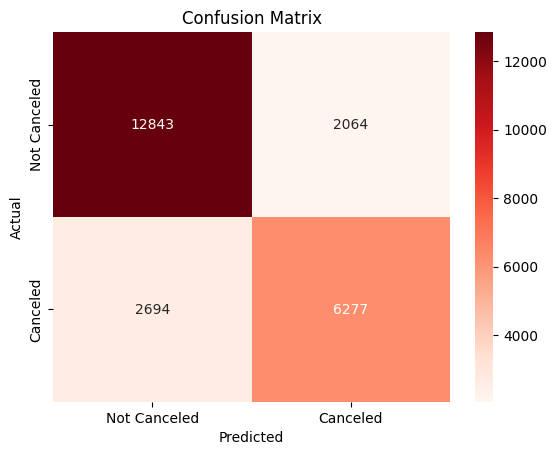

In [13]:
# Visualisasi Confusion Matrix
labels = ['Not Canceled', 'Canceled']
sns.heatmap(confusion, annot=True, fmt='d', cmap='Reds', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [14]:
# Calculate ratio of cancellation of Booking
cancelled_perc = data['is_canceled'].value_counts(normalize=True)
print(cancelled_perc)

0    0.629584
1    0.370416
Name: is_canceled, dtype: float64


**Dari 70000 data ternyata 40000 nya adalah customer yang sering membatalkan **

0    0.629584
1    0.370416
Name: is_canceled, dtype: float64


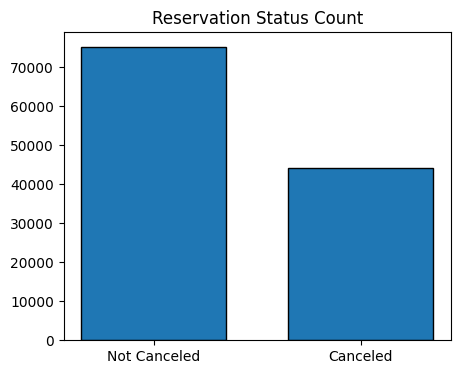

In [15]:
# Calculate ratio of cancellation of Booking
cancelled_perc = data['is_canceled'].value_counts(normalize=True)
print(cancelled_perc)

plt.figure(figsize=(5, 4))
plt.title('Reservation Status Count')
plt.bar(['Not Canceled', 'Canceled'], data['is_canceled'].value_counts(), edgecolor='k', width=0.7)
plt.show()



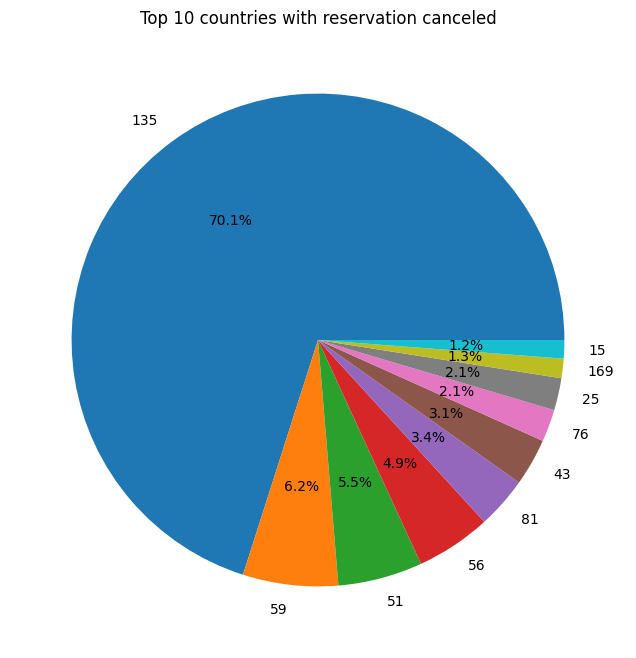

In [16]:
cancel_data = data[data['is_canceled'] == 1]
plt.figure(figsize=(8, 8))
cancel_countries = cancel_data['country'].value_counts()[:10]
labels = [data[data['country'] == country]['country'].iloc[0] for country in cancel_countries.index]
plt.pie(cancel_countries, labels=labels, autopct='%.1f%%')
plt.title('Top 10 countries with reservation canceled')
plt.show()

In [17]:
cancel = data['is_canceled'].value_counts(normalize=True) * 100
cancel_index = ['Reserved', 'Cancelled']
print(cancel)


0    62.958372
1    37.041628
Name: is_canceled, dtype: float64


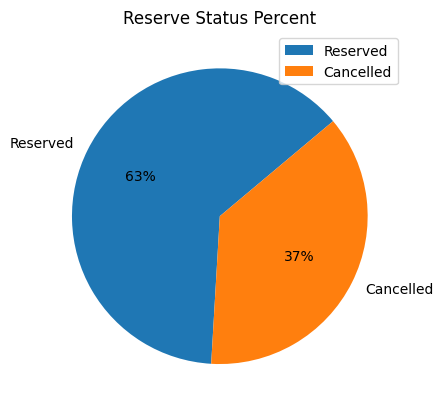

In [18]:

plt.pie(cancel, labels=['Reserved', 'Cancelled'], startangle=40, autopct='%1.f%%')
plt.legend(['Reserved', 'Cancelled'])
plt.title('Reserve Status Percent')
plt.show()

Faktor yang mempengaruhi pembatalan menjadi fokus pada eksperimen tugas data mining ini


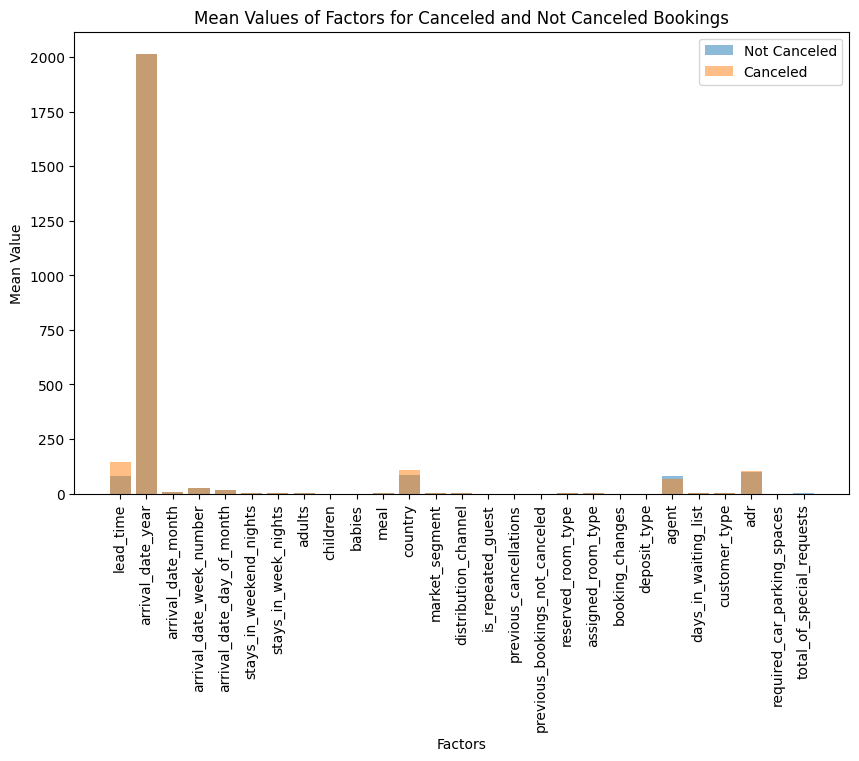

In [19]:
# Analisis faktor-faktor yang mempengaruhi pembatalan pemesanan
factors = ['lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'agent', 'days_in_waiting_list', 'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']
canceled_data = data[data['is_canceled'] == 1]
not_canceled_data = data[data['is_canceled'] == 0]
canceled_data_mean = canceled_data[factors].mean()
not_canceled_data_mean = not_canceled_data[factors].mean()

plt.figure(figsize=(10, 6))
plt.bar(factors, not_canceled_data_mean, alpha=0.5, label='Not Canceled')
plt.bar(factors, canceled_data_mean, alpha=0.5, label='Canceled')
plt.xticks(rotation=90)
plt.xlabel('Factors')
plt.ylabel('Mean Value')
plt.title('Mean Values of Factors for Canceled and Not Canceled Bookings')
plt.legend()
plt.show()


Melihat perbandingan berapa banyak orang menginap  di waktu malam hari kerja atau waktu malam weekend

In [24]:
from sklearn.cluster import KMeans

In [25]:
# Select the features for the experiment
X = data[['stays_in_week_nights', 'stays_in_weekend_nights']]
y = data['is_canceled']

In [27]:
# Perform K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

In [28]:
# Get the cluster labels
labels = kmeans.labels_

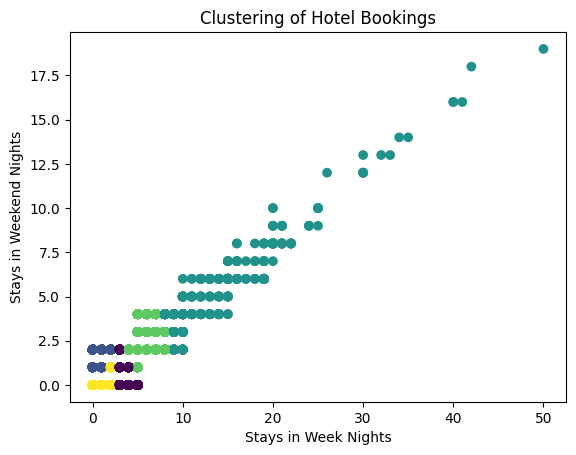

In [29]:
# Visualize the clusters
plt.scatter(X['stays_in_week_nights'], X['stays_in_weekend_nights'], c=labels, cmap='viridis')
plt.xlabel('Stays in Week Nights')
plt.ylabel('Stays in Weekend Nights')
plt.title('Clustering of Hotel Bookings')
plt.show()

In [30]:
# Count the number of canceled and not canceled bookings in each cluster
cluster_df = pd.DataFrame({'stays_in_week_nights': X['stays_in_week_nights'], 'stays_in_weekend_nights': X['stays_in_weekend_nights'], 'label': labels, 'is_canceled': y})
cluster_summary = cluster_df.groupby(['label', 'is_canceled']).size().unstack()

print('Cluster Summary:')
print(cluster_summary)

Cluster Summary:
is_canceled      0      1
label                    
0            18759  11223
1            17501  10037
2             1124    677
3            10262   5706
4            27520  16581
